# Data Cleansing 

Code Referenced: 

Ian Mc Loughlin: Cleansing

https://docs.python.org/3/library/re.html

https://realpython.com/regex-python/

https://developers.google.com/edu/python/regular-expressions

***

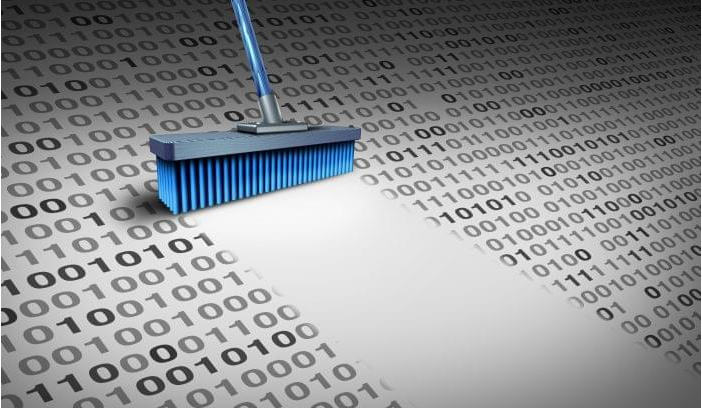

In [1]:
# Regular Expression

import re

In [2]:
# Matches a "word" character: a letter or digit or underscore [a-zA-Z0-9_].
# \w = '[a-zA-Z0-9_]'

# Matches any non-word character.
# \W = '[^a-zA-Z0-9_]'

In [3]:
# A string to be manipulated.
original = 'Words, words, words.'

# The pattern/regular expression to use on the above string.
pattern = r'\W+'

# Splits a string into substrings using a regular expression.
result = re.split(pattern, original)

# Print the result.
print(result)

['Words', 'words', 'words', '']


In [4]:
# A string to be manipulated.
original = 'Words, words, words.'

# The pattern/regular expression to use on the above string.
pattern = r'(\W+)'

# Splits a string into substrings using a regular expression.
result = re.split(pattern, original)

# Print the result.
print(result)

['Words', ', ', 'words', ', ', 'words', '.', '']


In [5]:
re.split(r'\W+', 'Words, words, words.', 1)


['Words', 'words, words.']

In [6]:
re.split('[a-f]+', '0a3B9', flags=re.IGNORECASE)

['0', '3', '9']

## Real Python

***

In [7]:
'abccba' == 'abccba'

True

In [8]:
'abccba' == 'cbaabc'


False

In [9]:
'abc' in 'cbaabc'


True

In [10]:
'cbaabc'.index('a')

2

In [11]:
'cbaabc'[2]

'a'

In [12]:
'cbaaabc'.find('aa')

2

In [13]:
s = 'foo123bar'

re.search('123', s)

<re.Match object; span=(3, 6), match='123'>

In [14]:
s[3:6]

'123'

In [15]:
re.search(r'[0-9][0-9][0-9]', 'foo456bar')

<re.Match object; span=(3, 6), match='456'>

In [16]:
re.search(r'[0-9][0-9][0-9]', '234baz')

<re.Match object; span=(0, 3), match='234'>

In [17]:
re.search(r'[0-9][0-9][0-9]', 'qux678')

<re.Match object; span=(3, 6), match='678'>

In [18]:
print(re.search(r'[0-9][0-9][0-9]', '12foo34'))

None


In [19]:
re.search(r'[0-9]{3}', 'qux678')

<re.Match object; span=(3, 6), match='678'>

## Google for Education

***

In [20]:
import re

str = 'an example word:cat!!'
match = re.search(r'word:\w\w\w', str)
# If-statement after search() tests if it succeeded
if match:
  print('found', match.group()) ## 'found word:cat'
else:
  print('did not find')

found word:cat


In [21]:
string = 'aaaabaa'
pattern = r'a+'

re.search(pattern, string)

<re.Match object; span=(0, 4), match='aaaa'>

In [22]:
string = 'aaaabaa'
pattern = r'a*'

re.search(pattern, string)

<re.Match object; span=(0, 4), match='aaaa'>

In [23]:
## i+ = one or more i's, as many as possible.
match = re.search(r'pi+', 'piiig') # found, match.group() == "piii"
match

<re.Match object; span=(0, 4), match='piii'>

In [24]:
## Finds the first/leftmost solution, and within it drives the +
## as far as possible (aka 'leftmost and largest').
## In this example, note that it does not get to the second set of i's.
match = re.search(r'i+', 'piigiiii') # found, match.group() == "ii"
match

<re.Match object; span=(1, 3), match='ii'>

In [25]:
## \s* = zero or more whitespace chars
## Here look for 3 digits, possibly separated by whitespace.
match = re.search(r'\d\s*\d\s*\d', 'xx1 2   3xx') # found, match.group() == "1 2   3"
print(match)
match = re.search(r'\d\s*\d\s*\d', 'xx12  3xx') # found, match.group() == "12  3"
print(match)
match = re.search(r'\d\s*\d\s*\d', 'xx123xx') # found, match.group() == "123"
print(match)

<re.Match object; span=(2, 9), match='1 2   3'>
<re.Match object; span=(2, 7), match='12  3'>
<re.Match object; span=(2, 5), match='123'>


In [26]:
## ^ = matches the start of string, so this fails:
match = re.search(r'^b\w+', 'foobar') # not found, match == None
match

In [27]:
## but without the ^ it succeeds:
match = re.search(r'b\w+', 'foobar') # found, match.group() == "bar"
match

<re.Match object; span=(3, 6), match='bar'>

In [28]:
str = 'purple alice-b@google.com monkey dishwasher'
match = re.search(r'\w+@\w+', str)
if match:
    print(match.group())  ## 'b@google'


b@google


In [29]:
# Square Brackets 
# For the emails problem, the square brackets are an easy way to add '.' and '-' to the set of chars 
# which can appear around the @ with the pattern r'[\w.-]+@[\w.-]+' to get the whole email address:

match = re.search(r'[\w.-]+@[\w.-]+', str)
if match:
    print(match.group())  ## 'alice-b@google.com'

alice-b@google.com


In [30]:
# Group Extraction
# The "group" feature of a regular expression allows you to pick out parts of the matching text, using (). 

str = 'purple alice-b@google.com monkey dishwasher'
match = re.search(r'([\w.-]+)@([\w.-]+)', str)
if match:
    print(match.group())   ## 'alice-b@google.com' (the whole match)
    print(match.group(1))  ## 'alice-b' (the username, group 1)
    print(match.group(2))  ## 'google.com' (the host, group 2)

alice-b@google.com
alice-b
google.com


In [31]:
## Findall

# findall() finds *all* the matches and returns them as a list of strings, with each string representing one match.

## Suppose we have a text with many email addresses
str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'

## Here re.findall() returns a list of all the found email strings
emails = re.findall(r'[\w\.-]+@[\w\.-]+', str) ## ['alice@google.com', 'bob@abc.com']
for email in emails:
    # do something with each found email string
    print(email)



alice@google.com
bob@abc.com


## Exercise 1

### Write a Python function to remove all non-alphanumeric characters from a string.

In [13]:
import re

def remove_non_alphanumeric(s):
    """Remove all non-alphanumeric characters from a string.
    
    Args:
        s (str): The input string.
        
    Returns:
        str: The input string with all non-alphanumeric characters removed.
    """
    # Use regular expression to match all non-alphanumeric characters. [3]
    pattern = r"[^\w]"
    
    # Replace all non-alphanumeric characters with an empty string. [2]
    return re.sub(pattern, "", s)

# Test the remove_non_alphanumeric function
print(remove_non_alphanumeric("Hello, World!"))  # Output: "HelloWorld"
print(remove_non_alphanumeric("1234567890"))  # Output: "1234567890"
print(remove_non_alphanumeric("$%^&*()_+"))  # Output: ""


HelloWorld
1234567890
_


## References

***

1. How to Use Regex in Python. https://www.educative.io/answers/how-to-use-regex-in-python
2. Remove Non Alphanumeric Characters from a String. https://bobbyhadz.com/blog/python-remove-non-alphanumeric-characters-from-string
3. Functions in R. https://www.datacamp.com/tutorial/functions-in-r-a-tutorial